In [3]:
# read the data back
import h5py
import numpy as np

path = r"outputs\ts_2mTemp_(5_30_noVicinity_para).h5"

In [4]:
with h5py.File(path, "r") as f:
    ts_2mTemp = {}
    for key in f.keys():
        key_parts = key.split('_')
        key_tuple = (int(key_parts[0]), int(key_parts[1]))
        ts_2mTemp[key_tuple] = np.array(f[key])

## Compute the max-temp time-series

In [5]:
N = 8*15*12 # 8 hours per day, 15 days per month, 12 months per year
N_years = 80 # 1945, 1942, ..., 2024, 80 years in total

In [6]:
LAT_RANGE = (90, 66.5) # the entire map is from 90 degree to 66.5 degree, closed interval
LON_RANGE = (-180, 179.5)
LAT_RESOL = 5 # the grid resolution of latitudes; two distinct lats are differred by 5 degrees
LON_RESOL = 30

DISTINCT_LATS = [90 - i * LAT_RESOL 
    for i in range(int((abs(LAT_RANGE[1] - LAT_RANGE[0]) // LAT_RESOL) + 1))] # round down when sampling points
DISTINCT_LONS = [-180 + i * LON_RESOL 
    for i in range(int((abs(LON_RANGE[1] - LON_RANGE[0]) // LON_RESOL) + 1))]

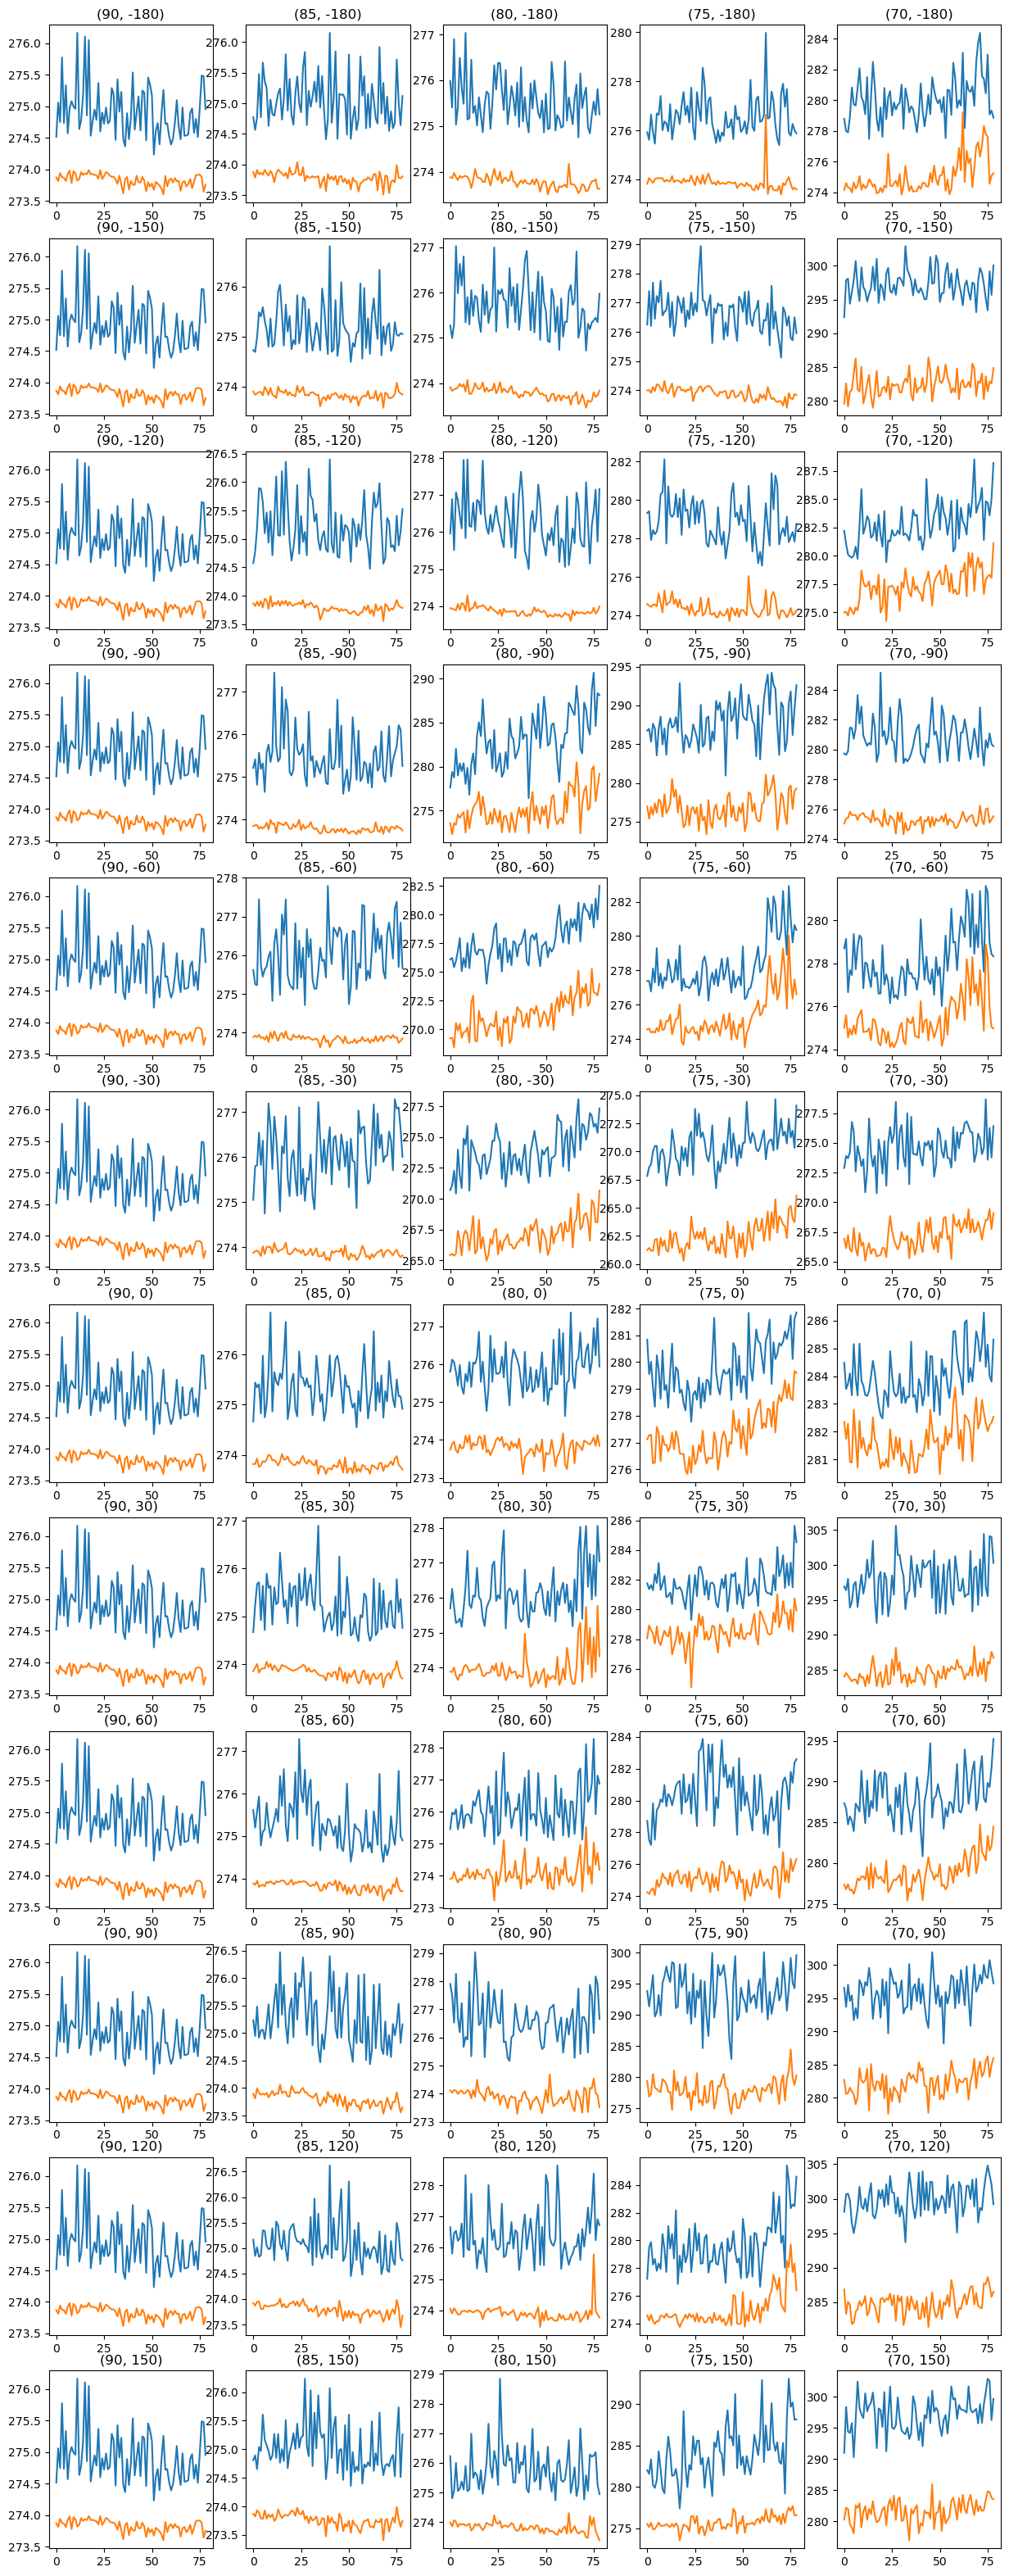

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(len(DISTINCT_LONS), len(DISTINCT_LATS), figsize=(15, 40))
for i, lon in enumerate(DISTINCT_LONS):
    for j, lat in enumerate(DISTINCT_LATS):
        # maximize the temp over each year 
        ts_annualMax_2mTemp = np.array([ts_2mTemp[(lat, lon)][y*N:(y+1)*N].max() 
                                             for y in range(0, N_years-1)])
        # get the 90th percentile of the target temp over each year 
        ts_annual90Percentile_2mTemp = np.array([np.percentile(ts_2mTemp[(lat, lon)][y*N:(y+1)*N], 90) 
                                             for y in range(0, N_years-1)])
        ax[i, j].plot(ts_annualMax_2mTemp, label="Max")
        ax[i, j].plot(ts_annual90Percentile_2mTemp, label="90th percentile")
        # ax[i, j].legend()
        ax[i, j].set_title(f"({lat}, {lon})")
        
plt.show()
# fig.savefig(r"outputs\ts_2mTemp_(5_30_1_1_" + str(LON_shift) + ").png")
fig.savefig(r"outputs\ts_2mTemp_(5_30_noVicinity_para).png")